In [5]:
%matplotlib inline
import pandas as pd

In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Hand in Hand,1985
1,The Caravaggio Conspiracy,1984
2,Postcard Days,2010
3,Haebyeoneuro gada,2000
4,Royal Blues,1997


In [8]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [9]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  16
Macbeth                 15
Maya                    12
The Outsider            12
Freedom                 11
Othello                 11
The Three Musketeers    11
Temptation              11
Vengeance               10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [10]:
t = titles
t[t.year//10 == 190].head(3)

,title,year
1405,Sonho de Valsa,1909
2473,Ju-Jitsu,1907
5727,May Day Parade,1900


### Plot the number of films that have been released each decade over the history of cinema.

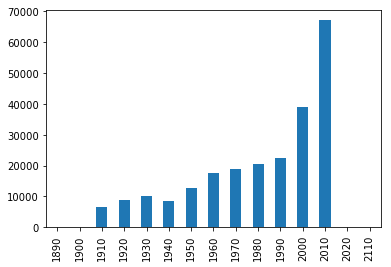

In [20]:
t = titles
(t.year//10*10).value_counts().sort_index().plot(kind ='bar')


### Plot the number of "Hamlet" films made each decade.

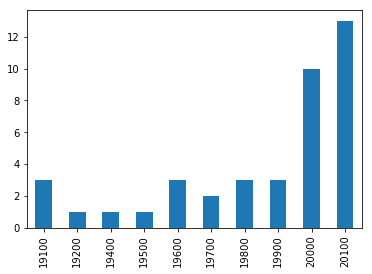

In [24]:
t=titles
t = t[t.title.str.startswith('Hamlet')]
(t.year//10*100).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

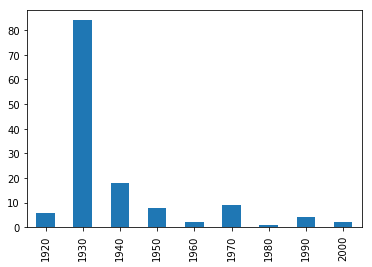

In [27]:
c = cast
c = c[c.character == 'Rustler']
(c.year//10*10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Hamlet" characters each decade.

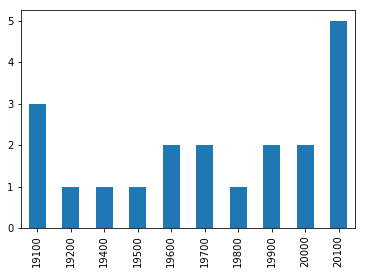

In [32]:
t= titles
t =t[t.title == 'Hamlet']
(t.year//10*100).value_counts().sort_index().plot(kind = 'bar')

### What are the 11 most common character names in movie history?

In [33]:
cast.character.value_counts().head(11)

Himself        20528
Dancer         12173
Extra          11281
Reporter        8282
Doctor          7540
Student         7430
Policeman       6961
Party Guest     6910
Nurse           6773
Bartender       6710
Herself         6479
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [39]:
c = cast[cast.character == 'Herself']
c.name.value_counts().head(10)


Queen Elizabeth II    11
Mary Jo Pehl           9
Laura (II) M?gica      9
Joyce Brothers         9
Margaret Thatcher      9
In?s J. Southern       8
Marta Berrocal         8
Estrella Borja         8
Marina Revilla         8
?ngela Silv?n          7
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [40]:
c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler          100
Richard Nixon          46
Ronald Reagan          41
John F. Kennedy        36
George W. Bush         24
Ron Jeremy             23
Winston Churchill      23
Benito Mussolini       22
Martin Luther King     22
Bill Clinton           22
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [41]:
c= cast
c[c.year == 1945].name.value_counts().head(1)

Emmett Vogan    39
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [42]:
c= cast
c[c.year == 1985].name.value_counts().head(1)

Mammootty    22
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

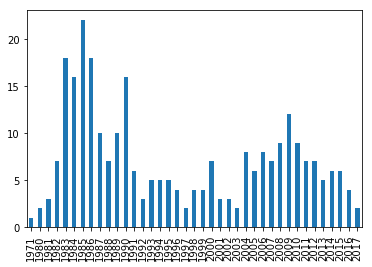

In [48]:
c = cast
c[c.name == 'Mammootty'].year.value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [45]:
c= cast
c[c.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Club                   3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [47]:
c= cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Reporter         5
Science Kid              5
Science Promo Cadet      5
Science Club Member      5
Science Fair Judge       5
Science                  4
Science Fair Kid         4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

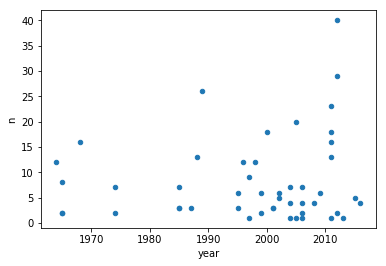

In [52]:
c= cast
c=c[c.name == 'Judi Dench'].sort_values('year')
c= c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

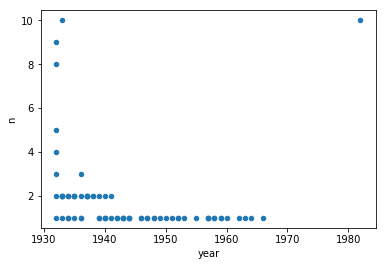

In [55]:
c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y = 'n', kind = 'scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

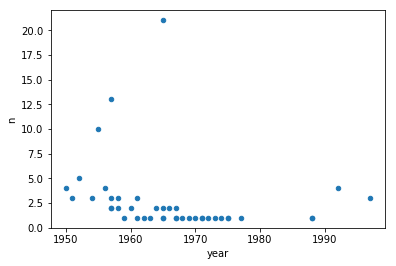

In [58]:
c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [66]:
c =cast
c[(c.n == 1)&((c.year//10*10) == 1950)].type.value_counts()


actor      6669
actress    3005
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [68]:
c = cast
c[(c.n==2)&((c.year//10)==195)].type.value_counts()

actor      4606
actress    4598
Name: type, dtype: int64